## Algebra - Basics of Computations

In [5]:
import sagemath

# Bases, components, reflections and projections

What are the components of the vector $ \begin{pmatrix} 1 \\ 3 \\ 5\\ 7 \\ 6\\ 4 \\ 2\end{pmatrix} $ in standard Euclidean space/Cartesian basis? What is its projection into the 1-2-plane?

What are its components in terms of the basis $b_1= \begin{pmatrix} 1 \\ 1 \\ 0\\ 0 \\ 0\\ 0 \\ 0\end{pmatrix}, b_2= \begin{pmatrix} 1 \\ -1 \\ 0\\ 0 \\ 0\\ 0 \\ 0\end{pmatrix}, b_3= \begin{pmatrix} 0 \\ 0 \\ 1\\ 1 \\ 0\\ 0 \\ 0\end{pmatrix}, b_4= \begin{pmatrix} 0 \\ 0 \\ 1\\ -1 \\ 0\\ 0 \\ 0\end{pmatrix}, b_5= \begin{pmatrix} 0 \\ 0 \\ 0\\ 0 \\ 1\\ 1 \\ 0\end{pmatrix}, b_6= \begin{pmatrix} 0 \\ 0 \\ 0\\ 0 \\ 1\\ -1 \\ 0\end{pmatrix}, b_7= \begin{pmatrix} 0 \\ 0 \\ 0\\ 0 \\ 0\\ 0 \\ 1\end{pmatrix}$. What is its projection into the 1-2-plane, 5-6-plane and 6-7-plane?

Hints: For the first case, the components are just the entries of the vector in each dimension, because the Cartesian basis vectors are so simple, orthogonal and normalised. 

The general formula is $v= \frac{v\cdot e_1}{e_1 \cdot e_1} e_1 + \frac{v\cdot e_2}{e_2 \cdot e_2} e_2 +\dots$ which just resolves the vector with respect to some basis in terms of coefficients with respect to that basis. Here for the Cartesian basis the denominators are just 1 because the basis is normalised. 

So the projection into the 12-plane is just $v=\begin{pmatrix} 1 \\ 3 \\ 0\\ 0 \\ 0\\ 0 \\ 0\end{pmatrix} $


For any other basis $f_i$ it'd just be $v= \frac{v\cdot f_1}{f_1 \cdot f_1} f_1 + \frac{v\cdot f_2}{f_2 \cdot f_2} f_2 +\dots$

In [ ]:
# Sample 

v = vector([1,3,5,7,6,4,2])

e1=vector([1,0,0,0,0,0,0])
e2=vector([0,1,0,0,0,0,0])
e3=vector([0,0,1,0,0,0,0])
e4=vector([0,0,0,1,0,0,0])
e5=vector([0,0,0,0,1,0,0])
e6=vector([0,0,0,0,0,1,0])
e7=vector([0,0,0,0,0,0,1])

basis_list = [e1, e2, e3, e4, e5, e6, e7]

#print components
print('Components are ')
for basis_vec in basis_list:
    print((basis_vec*v)/(basis_vec*basis_vec))

#print projections onto each basis vector
print('Projections are ')
for basis_vec in basis_list:
    print((basis_vec*v)/(basis_vec*basis_vec)*basis_vec) #bit confusing to mix the *notation for scalar product between vectors as well as scalar multiplication of a vector

    
#start with nothing and add in the components along each basis vector - get back what we started with
v_reconst = vector([0,0,0,0,0,0,0])

for basis_vec in basis_list:
    v_reconst = v_reconst+(basis_vec*v)/(basis_vec*basis_vec)*basis_vec
    
print('Get back what we started with: before ', v, 'after ', v_reconst)

In [2]:
import sagemath

You can adapt this code now to work with the more awkward basis!


Resolving a vector in terms of an orthogonal basis as above allows us to project out unwanted components (**dimensionality reduction**), perhaps because they don't carry a lot of meaning (**noise**), and is the basis for **principal component analysis**.

# Noisy circle and clustering

How could you use the random() routine we used for the noisy straight line code to 
1) sample randomly along the circle
2) add some noise in the orthogonal direction?

/tmp/ipykernel_34265/964539660.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tmp2 = float(np.random.normal(RealNumber('0.1'), RealNumber('0.1'), Integer(1)))


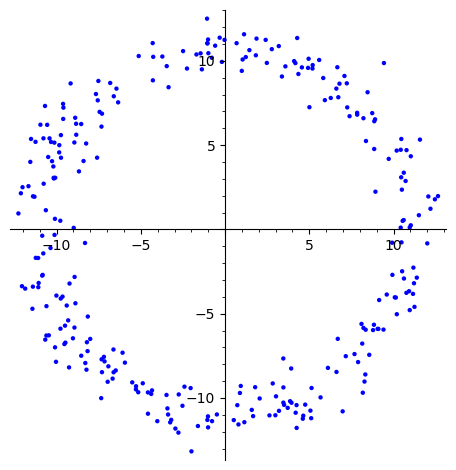

In [4]:
import matplotlib.pyplot as plt
import random
import numpy as np

number_of_samples = 300
radius = 10
pointlist = []

for i in range(number_of_samples):
    tmp = 2*3.1416*random.random()
    tmp2 = float(np.random.normal(0.1, 0.1, 1))
    pointlist.append([radius *(1+tmp2)* np.cos(tmp) , radius *(1+tmp2)* np.sin(tmp)])

points(pointlist, aspect_ratio = 1)

Now we connect points that are closer than a certain threshold to each other.

In [ ]:
# Sample

v = vector([6, 18, 13])

norm(v)

In [ ]:
threshold = 1
plot = point2d(pointlist, aspect_ratio = 1)
for i in pointlist:
    for j in pointlist:
        if(norm(vector(i)-vector(j)))<threshold:
            plot = plot + line2d([vector(i), vector(j)])
display(plot)

Play around with the level of the threshold. How does the number of connected components depend on the threshold?

# Clusters and centroids

We do one step in the k-means clustering algorithm now, for a very simple example!

First, we generate two random clusters and initialise the cluster positions to something arbitrary.

Then you need to compute the centroids of the two clusters and update the cluster position to these new values.

Normally, in a real example, you would then have to check which data point is closer to which cluster position - you'll see in this basic example that we seem to have done pretty well! 

In [ ]:
number_of_samples = 300
radius = 10
cluster_pointlist1 = []
cluster_pointlist2 = []

for i in range(number_of_samples):
    cluster_pointlist1.append(vector([1+float(np.random.normal(0.1, 0.1, 1)) , 2+float(np.random.normal(0.1, 0.3, 1))]))
    cluster_pointlist2.append(vector([-2+float(np.random.normal(0.1, 0.15, 1)) , -2+float(np.random.normal(0.2, 0.1, 1))]))

plot1 = points(cluster_pointlist1, color = 'red', aspect_ratio = 1)
plot2 = points(cluster_pointlist2, color = 'blue', aspect_ratio = 1)
display(plot1+plot2)

In [ ]:
centroid1 = vector([-1, 1])
centroid2 = vector([1, -1])

plot3 = points(centroid1, color = 'green', aspect_ratio = 1, size = 125)
plot4 = points(centroid2, color = 'green', aspect_ratio = 1, size = 125)
display(plot1+plot2+plot3+plot4)

In [ ]:
new_centroid1 = vector([0, 0])
new_centroid2 = vector([0, 0])

for redpoint in cluster_pointlist1:
    new_centroid1 +=  redpoint
new_centroid1= new_centroid1/len(cluster_pointlist1)

for bluepoint in cluster_pointlist2:
    new_centroid2 +=  bluepoint
new_centroid2= new_centroid2/len(cluster_pointlist2)

In [ ]:
plot5 = points(new_centroid1, color = 'yellow', aspect_ratio = 1, size = 125)
plot6 = points(new_centroid2, color = 'yellow', aspect_ratio = 1, size = 125)
display(plot1+plot2+plot3+plot4+plot5+plot6)

In [22]:
threshold = 1
plot7 = point2d(cluster_pointlist1, aspect_ratio = 1)
for i in cluster_pointlist1:
    for j in cluster_pointlist1:
        if(norm(vector(i)-vector(j)))<threshold:
            plot7 = plot7 + line2d([vector(i), vector(j)])

plot8 = point2d(cluster_pointlist2, aspect_ratio = 1)
for i in cluster_pointlist2:
    for j in cluster_pointlist2:
        if(norm(vector(i)-vector(j)))<threshold:
            plot8 = plot8 + line2d([vector(i), vector(j)])


In [ ]:
display(plot1+plot2+plot3+plot4+plot5+plot6+plot7+plot8)